In [1]:
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
import mglearn

C:\Users\didix\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
C:\Users\didix\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


w[0]: 0.393906  b: -0.031804


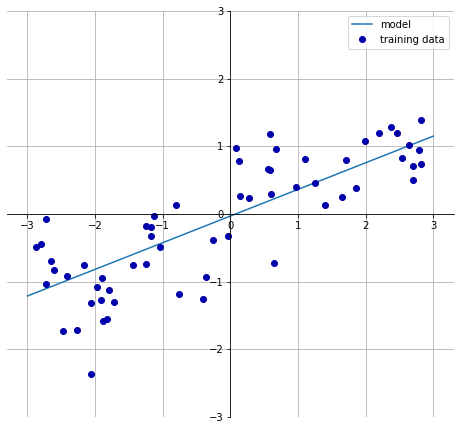

In [2]:
mglearn.plots.plot_linear_regression_wave()

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [4]:
X,y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

In [5]:
print("lr.coef_: ",lr.coef_)
print("lr.intercept_: ", lr.intercept_)

lr.coef_:  [0.39390555]
lr.intercept_:  -0.031804343026759746


In [6]:
print("훈련 세트 점수 : {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}".format(lr.score(X_test, y_test)))

훈련 세트 점수 : 0.67
테스트 세트 점수 : 0.66


In [8]:
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr2 = LinearRegression().fit(X_train, y_train)

In [9]:
print("훈련 세트 점수 : {:.2f}".format(lr2.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}".format(lr2.score(X_test, y_test)))

훈련 세트 점수 : 0.95
테스트 세트 점수 : 0.61


In [15]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("훈련 세트 점수 : {:.2f}".format(ridge.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}".format(ridge.score(X_test, y_test)))

훈련 세트 점수 : 0.89
테스트 세트 점수 : 0.75


In [16]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("훈련 세트 점수 : {:.2f}".format(ridge10.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}".format(ridge10.score(X_test, y_test)))

훈련 세트 점수 : 0.79
테스트 세트 점수 : 0.64


In [19]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("훈련 세트 점수 : {:.2f}".format(ridge01.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}".format(ridge01.score(X_test, y_test)))

훈련 세트 점수 : 0.93
테스트 세트 점수 : 0.77


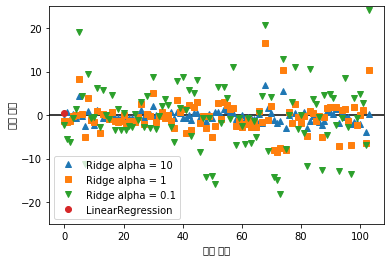

In [30]:
plt.plot(ridge10.coef_, '^', label="Ridge alpha = 10") # 제일 좁게 분포한다 _ 파란색
plt.plot(ridge.coef_, 's', label="Ridge alpha = 1") # 중간정도이다 _ 주황색
plt.plot(ridge01.coef_, 'v', label="Ridge alpha = 0.1") # 제일 넓게 분포하는 것을 알 수 있다. _ 녹색

plt.plot(lr.coef_,'o', label="LinearRegression")
plt.xlabel("계수 목록")
plt.ylabel("계수 크기")
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-25, 25)
plt.legend()

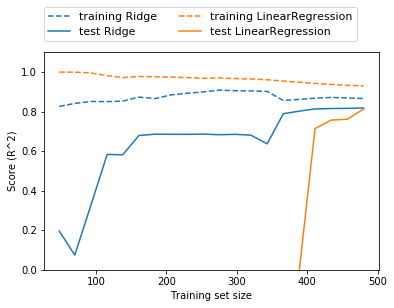

In [31]:
mglearn.plots.plot_ridge_n_samples()

In [44]:
from sklearn.linear_model import Lasso
import numpy as np

lasso = Lasso().fit(X_train, y_train)
print("훈련 세트 점수 : {:.2f}".format(lasso.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}".format(lasso.score(X_test, y_test)))
print("사용한 특성의 갯수 : ", np.sum(lasso.coef_ != 0))
print("모델이 수행한 횟수 : ", lasso.n_iter_)

훈련 세트 점수 : 0.29
테스트 세트 점수 : 0.21
사용한 특성의 갯수 :  4
모델이 수행한 횟수 :  34


In [45]:
#"max_iter" 기본 값을 증가시키지 않으면 max_iter 값을 늘이라는 경고가 발생합니다.
lasso001 = Lasso(alpha=0.01, max_iter = 100000).fit(X_train, y_train)
print("훈련 세트 점수 : {:.2f}".format(lasso001.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}".format(lasso001.score(X_test, y_test)))
print("사용한 특성의 갯수 : ", np.sum(lasso001.coef_ != 0))
print("모델이 수행한 횟수 : ", lasso001.n_iter_)

훈련 세트 점수 : 0.90
테스트 세트 점수 : 0.77
사용한 특성의 갯수 :  33
모델이 수행한 횟수 :  1886


In [46]:
lasso00001 = Lasso(alpha=0.0001, max_iter = 100000).fit(X_train, y_train)
print("훈련 세트 점수 : {:.2f}".format(lasso00001.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}".format(lasso00001.score(X_test, y_test)))
print("사용한 특성의 갯수 : ", np.sum(lasso00001.coef_ != 0))
print("모델이 수행한 횟수 : ", lasso00001.n_iter_)

훈련 세트 점수 : 0.95
테스트 세트 점수 : 0.64
사용한 특성의 갯수 :  96
모델이 수행한 횟수 :  41420


In [47]:
lasso00001_2 = Lasso(alpha=0.0001, max_iter = 100000000).fit(X_train, y_train)
print("훈련 세트 점수 : {:.2f}".format(lasso00001_2.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}".format(lasso00001_2.score(X_test, y_test)))
print("사용한 특성의 갯수 : ", np.sum(lasso00001_2.coef_ != 0))
print("모델이 수행한 횟수 : ", lasso00001_2.n_iter_)

훈련 세트 점수 : 0.95
테스트 세트 점수 : 0.64
사용한 특성의 갯수 :  96
모델이 수행한 횟수 :  41420


Text(0, 0.5, '계수 크기')

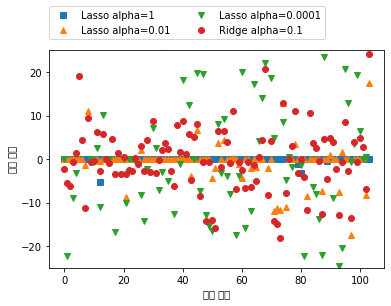

In [50]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")

plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)

plt.xlabel("계수 목록")
plt.ylabel("계수 크기")

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

C:\Users\didix\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\didix\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\didix\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


C:\Users\didix\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\didix\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\didix\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\didix\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0, flags=flags)


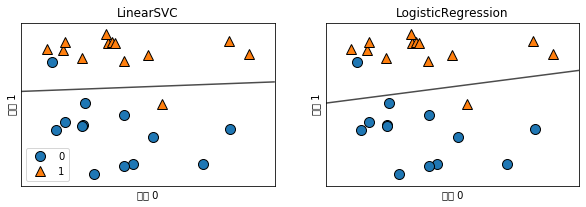

In [55]:
X, y = mglearn.datasets.make_forge()
fig, axes = plt.subplots(1, 2, figsize=(10,3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X,y)
    mglearn.plots.plot_2d_separator(clf, X, fill = False, eps=0.5,
                                   ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax= ax)
    ax.set_title(clf.__class__.__name__)
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
axes[0].legend()

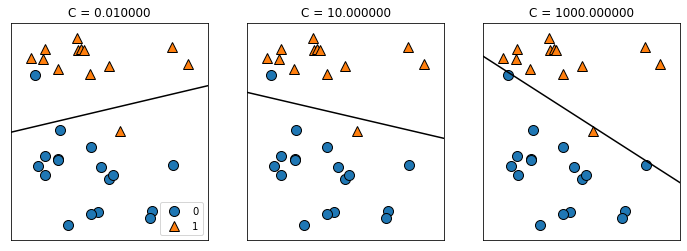

In [57]:
mglearn.plots.plot_linear_svc_regularization()

'0.21.3'